<a href="https://colab.research.google.com/github/Parth-Rawri/CIFAR10/blob/main/Classifying_images_of_everyday_objects_using_a_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying images of everyday objects using a neural network

In [ ]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import CIFAR10
from torchvision.transforms import transforms
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

### Step 1: Exploring the CIFAR10 dataset

In [ ]:
dataset = CIFAR10(root = '/content/', download = True, train = True)
test_dataset = CIFAR10(root = '/content/', download = True, train = False)


Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified


In [ ]:
len(dataset), len(test_dataset)

(50000, 10000)

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7F351DED9E10>, 6)

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F351DEE4B50>
Label: 6


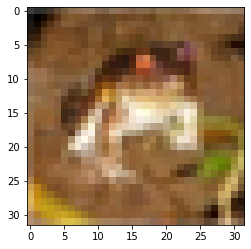

In [ ]:
image, label = dataset[0]
plt.imshow(image)
print(image)
print('Label:', label)

Label: 2


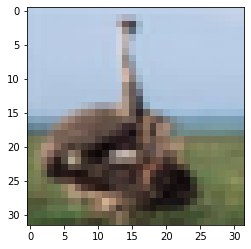

In [ ]:
image, label = dataset[2354]
plt.imshow(image)
print('Label:', label)

In [ ]:
# Transforming the images to Tensors

dataset = CIFAR10(root = '/content/', download = True, train = True, transform = transforms.ToTensor())
test_dataset = CIFAR10(root = '/content/', download = True, train = False, transform = transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
img_tensor, label = dataset[0]
print(f"img_tensor Shape: {img_tensor.shape}, label: {label} \n")
print(img_tensor)

img_tensor Shape: torch.Size([3, 32, 32]), label: 6 

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
    

In [ ]:
dataset_size = len(dataset)
test_dataset_size = len(test_dataset)
classes = dataset.classes

img_tensor, label = dataset[0]
img_shape = img_tensor.shape

print(f"# Images in the training dataset: {dataset_size} \n")
print(f"# Images in the test dataset: {test_dataset_size} \n")
print(f"Output classes in the dataset: {classes} \n")
print("# Classes: ", len(classes), "\n")
print(f"Shape of the image tensor: {img_shape} \n")

# Images in the training dataset: 50000 

# Images in the test dataset: 10000 

Output classes in the dataset: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] 

# Classes:  10 

Shape of the image tensor: torch.Size([3, 32, 32]) 



Looking at a sample image from the dataset.

`matplotlib` expects channels to be the last dimension of the image tensors (whereas in PyTorch they are the first dimension), so we'll the `.permute` tensor method to shift channels to the last dimension.

Label (numeric): 6
Label (textual): frog


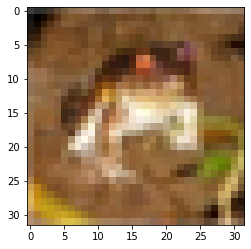

In [ ]:
img, label = dataset[0]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

Label (numeric): 7
Label (textual): horse


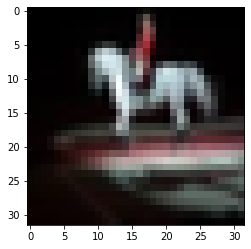

In [ ]:
img, label = dataset[3450]
plt.imshow(img.permute((1, 2, 0)))
print('Label (numeric):', label)
print('Label (textual):', classes[label])

In [ ]:
# Determining # images belonging to each class

for i in range(len(classes)):
  num_images = 0
  for _, label in dataset:
    if label == i:
      num_images += 1
  print(f"# {classes[i]} images: {num_images}")

# airplane images: 5000
# automobile images: 5000
# bird images: 5000
# cat images: 5000
# deer images: 5000
# dog images: 5000
# frog images: 5000
# horse images: 5000
# ship images: 5000
# truck images: 5000


### Step 2: Preparing the data for training

In [ ]:
# Splitting the dataset into training and validation sets
val_percent = 0.1
val_size = int(len(dataset) * val_percent)
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [ ]:
len(train_ds), len(val_ds)

(45000, 5000)

In [ ]:
# Creating DataLoaders
batch_size = 256

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(train_ds, batch_size)
test_loader = DataLoader(test_dataset, batch_size)

images.shape: torch.Size([256, 3, 32, 32])


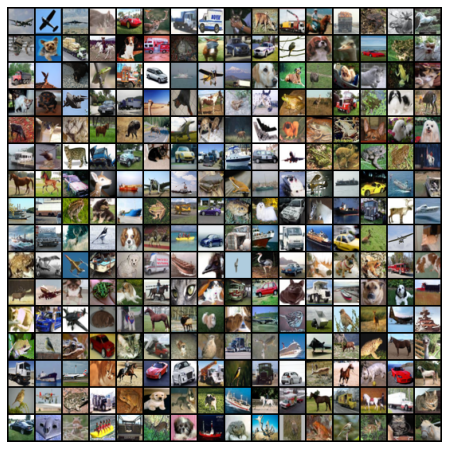

In [ ]:
# Visualizing a batch of data using the `make_grid` function 
for images, _ in train_loader:
  print('images.shape:', images.shape)
  plt.figure(figsize = (16,8))
  plt.axis('off')
  plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
  break

### Step 3: Creating the Model

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
      print(f"Epoch [{epoch}], val_loss: {result['val_loss']:.4f}, val_acc: {result['val_acc']:.4f}")

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        
    return history

 Checking if a GPU is available and the required NVIDIA CUDA drivers are installed

In [ ]:
torch.cuda.is_available()

True

Defining a helper function to ensure that our code uses the GPU if available and defaults to using the CPU if it isn't.

In [ ]:
def get_default_device():
  """ Pick GPU if available """
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

Moving the data to the device. Data can either be a tensor or a model. By default the data sits on the CPU.

In [ ]:
def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

In [ ]:
# Demonstration
# Moving a batch to the GPU

for images, labels in train_loader:
  print(images.shape)
  print(images.device)
  immages = to_device(images, device)
  print(images.device)
  break

torch.Size([256, 3, 32, 32])
cpu
cpu


Each time we get a batch of data we'll have to move it onto the GPU and once the processing is done and we try to move the next batch then the previous batch of data is automatically vacated by the GPU - carried out by DeviceDataLoader.

We take our training loader and pass it into the device data loader. <br>
We take our validation loader and pass it into the device data loader. <br>
The device dataloader will automatically move batches of data to the selected device.

In [ ]:
class DeviceDataLoader():
  """Wrap a dataloader to move data to a device"""
  def __init__(self, dl, device):
      self.dl = dl
      self.device = device
      
  def __iter__(self):
      """Yield a batch of data after moving it to device"""
      for b in self.dl: 
          yield to_device(b, self.device)

  def __len__(self):
      """Returns the Number of batches within the DataLoader"""
      return len(self.dl)

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

When we try to access a batch of data within a for loop from a validation data loader or train data loader, the batch of data will automatically be moved to the selected device.

In [ ]:
for xb, yb in val_loader:
  print('xb.device:', xb.device)
  print('yb', yb)
  break

xb.device: cuda:0
yb tensor([8, 7, 2, 4, 4, 7, 4, 9, 8, 3, 0, 0, 8, 6, 3, 5, 0, 0, 5, 5, 5, 6, 4, 6,
        3, 1, 7, 6, 5, 1, 6, 3, 2, 9, 9, 1, 2, 6, 7, 9, 3, 3, 7, 2, 6, 2, 9, 2,
        2, 4, 7, 2, 6, 5, 3, 6, 2, 0, 9, 4, 8, 8, 7, 4, 9, 5, 1, 8, 2, 7, 7, 3,
        7, 3, 7, 8, 1, 6, 9, 4, 6, 7, 3, 5, 0, 6, 8, 8, 1, 3, 8, 5, 7, 0, 2, 3,
        7, 0, 1, 8, 0, 0, 7, 9, 5, 5, 2, 3, 6, 4, 5, 1, 3, 0, 9, 3, 9, 0, 9, 1,
        3, 1, 0, 3, 5, 0, 4, 2, 8, 0, 9, 0, 7, 9, 0, 9, 5, 0, 9, 4, 1, 2, 8, 4,
        2, 7, 4, 9, 7, 9, 1, 4, 1, 9, 5, 7, 8, 8, 5, 7, 3, 8, 1, 6, 9, 7, 1, 1,
        1, 0, 4, 5, 1, 1, 3, 8, 3, 0, 7, 4, 7, 0, 5, 2, 2, 4, 2, 1, 0, 4, 4, 9,
        4, 4, 5, 7, 6, 0, 2, 3, 3, 3, 1, 5, 3, 1, 3, 4, 9, 3, 9, 0, 4, 1, 0, 1,
        4, 6, 8, 5, 8, 6, 5, 5, 2, 6, 9, 3, 0, 0, 5, 4, 1, 4, 1, 2, 0, 8, 2, 3,
        5, 3, 2, 0, 1, 2, 3, 0, 0, 0, 3, 6, 8, 1, 6, 7], device='cuda:0')


In [ ]:
print(xb.shape)

torch.Size([256, 3, 32, 32])


In [ ]:
print(xb.size())

torch.Size([256, 3, 32, 32])


In [ ]:
print(xb.size(0))

256


In [ ]:
print(xb.view(xb.size(0), -1).shape)

torch.Size([256, 3072])


In [ ]:
# helper functions for plotting the losses & accuracies.

def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')

def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

### Step 4: Training the Model

In [ ]:
input_size = 3*32*32
output_size = 10

Extending the ImageClassificationBase class to complete the model definition.

In [ ]:
class CIFAR10Model(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(input_size, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 512)
        self.linear4 = nn.Linear(512, 256)
        self.linear5 = nn.Linear(256, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        xb = xb.view(xb.size(0), -1)              # [128, 3072]
        # Apply layers & activation functions
        out = self.linear1(xb)                    # [3072, 32]
        out = F.leaky_relu(out)
        out = self.linear2(out)                   # [32, 64]
        out = F.leaky_relu(out)
        out = self.linear3(out)                   # [64, 64]
        out = F.leaky_relu(out)                    
        out = self.linear4(out)                   # [64, 64]
        out = F.leaky_relu(out)
        out = self.linear5(out)                   # [64, 10]
        
        return out

Instantiate the model, and move it the appropriate device.

In [ ]:
model = to_device(CIFAR10Model(), device)

In [ ]:
total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params

2757386

In [ ]:
history = [evaluate(model, val_loader)]
history

[{'val_acc': 0.09989168494939804, 'val_loss': 2.3027307987213135}]

In [ ]:
%%time
epoch, lr = 5, 0.001
history += fit(epoch, lr, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4897, val_acc: 0.4640
Epoch [1], val_loss: 1.4217, val_acc: 0.4918
Epoch [2], val_loss: 1.3851, val_acc: 0.5043
Epoch [3], val_loss: 1.3194, val_acc: 0.5270
Epoch [4], val_loss: 1.3292, val_acc: 0.5226
CPU times: user 40.3 s, sys: 153 ms, total: 40.5 s
Wall time: 40.4 s


In [ ]:
%%time
epoch, lr = 5, 0.001
history += fit(epoch, lr, model, train_loader, val_loader)

Epoch [0], val_loss: 1.3313, val_acc: 0.5195
Epoch [1], val_loss: 1.2818, val_acc: 0.5343
Epoch [2], val_loss: 1.1742, val_acc: 0.5778
Epoch [3], val_loss: 1.1849, val_acc: 0.5720
Epoch [4], val_loss: 1.1099, val_acc: 0.6025
CPU times: user 40.3 s, sys: 167 ms, total: 40.5 s
Wall time: 40.5 s


In [ ]:
%%time
epoch, lr = 3, 0.0005
history += fit(epoch, lr, model, train_loader, val_loader)

Epoch [0], val_loss: 0.9977, val_acc: 0.6415
Epoch [1], val_loss: 0.9511, val_acc: 0.6599
Epoch [2], val_loss: 0.8886, val_acc: 0.6806
CPU times: user 24.3 s, sys: 87.2 ms, total: 24.4 s
Wall time: 24.3 s


In [ ]:
%%time
epoch, lr = 3, 0.00005
history += fit(epoch, lr, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8020, val_acc: 0.7153
Epoch [1], val_loss: 0.7867, val_acc: 0.7198
Epoch [2], val_loss: 0.7750, val_acc: 0.7261
CPU times: user 24.2 s, sys: 87.1 ms, total: 24.3 s
Wall time: 24.2 s


In [ ]:
%%time
epoch, lr = 3, 0.000005
history += fit(epoch, lr, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7669, val_acc: 0.7289
Epoch [1], val_loss: 0.7648, val_acc: 0.7302
Epoch [2], val_loss: 0.7631, val_acc: 0.7306
CPU times: user 24 s, sys: 98 ms, total: 24.1 s
Wall time: 24 s


In [ ]:
%%time
epoch, lr = 3, 0.0000001
history += fit(epoch, lr, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7631, val_acc: 0.7306
Epoch [1], val_loss: 0.7630, val_acc: 0.7306
Epoch [2], val_loss: 0.7630, val_acc: 0.7308
CPU times: user 24.2 s, sys: 95.3 ms, total: 24.3 s
Wall time: 24.3 s


In [ ]:
torch.save(model.state_dict(), 'Deeeeep 67.pth')

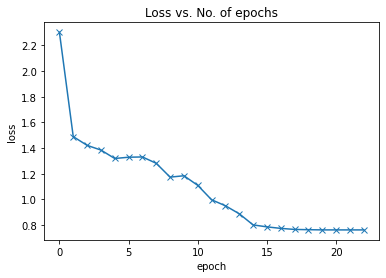

In [ ]:
plot_losses(history)

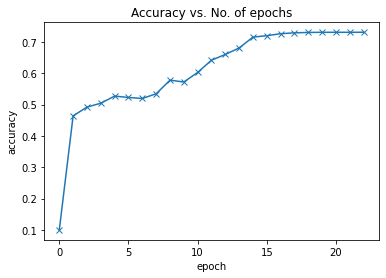

In [ ]:
plot_accuracies(history)

In [ ]:
test_acc = evaluate(model, test_loader)
test_acc

{'val_acc': 0.5380859375, 'val_loss': 1.4563790559768677}